# Compare `Tricubic` interpolator with *SciPy*'s offerings

We will compare the `Tricubic` interpolator based on [Lekien and Marsden (2005), "Tricubic interpolation in three dimensions," Int. J. Numer. Meth. Eng. 63, 455](https://doi.org/10.1002/nme.1296) with some tools in the *SciPy* package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tricubic import Tricubic
from scipy.interpolate import RegularGridInterpolator, Rbf

## One-dimensional function

Start with a simple one-dimensional cubic,
$$
f(x) = 2 x^3 - 3 x^2 - 3 x + 2.
$$

In [2]:
def f(x):
    return 2 * x**3 - 3 * x**2 - 3 * x + 2

The `Tricubic` object interpolates over three dimensions. So we define the following grid:

In [3]:
X = Y = Z = np.linspace(-3, 3, 11)

The interpolator requires the discrete values of the dependent function - $f(x)$ in this case - to be three-dimensional, where the $x$-, $y$- and $z$-dimensions have the same number of elements as the $x$, $y$ and $z$ measurements. For this one-dimensional case, this can be accomplished with

In [4]:
x, y, z = np.meshgrid(X, Y, Z, indexing="ij")
F = f(x)

Now we are in a position to interpolate. So we initialise the following object:

In [5]:
interp1 = Tricubic(X, Y, Z, F)

To compare with the data, we obtain the interpolated values of $f$ on a new grid, with the same limits as the data. (There is no extrapolation going on.) Since the function is one-dimensional, it is irrelevant what we input for $y$ and $z$.

In [6]:
Xnew = np.linspace(-3, 3, 101)
Fnew = np.zeros((Xnew.size))
for i, X0 in enumerate(Xnew):
    Fnew[i] = interp1(X0, 0, 0)

Plotting the results gives

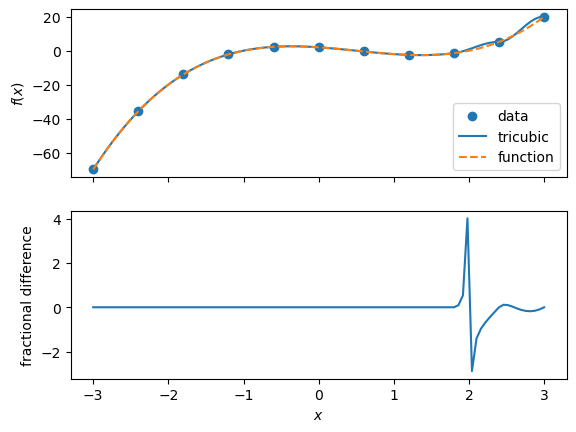

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(X, F[:, 5, 5], label="data")
ax[0].plot(Xnew, Fnew, label="tricubic")
ax[0].plot(Xnew, f(Xnew), label="function", ls="--")
ax[0].set_ylabel("$f(x)$")
ax[0].legend()

ax[1].plot(Xnew, (f(Xnew) - Fnew) / f(Xnew))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("fractional difference");

## Two-dimensional function

For the two-dimensional case, we will define a function inspired by the Ricker wavelet,
$$
\psi(x, y) = [1 - (x^2 + y^2)] e^{- (x^2 + y^2)} + 1.
$$
(The addition of $1$ is included to avoid zero for the accuracy estimates.)

In [8]:
def psi(x, y):
    return (1 - (x**2 + y**2)) * np.exp(-(x**2 + y**2)) + 1

Define the grid,

In [9]:
X = Y = Z = np.linspace(-3, 3, 21)
x, y, z = np.meshgrid(X, Y, Z, indexing="ij")
Psi = psi(x, y)

With this multi-dimensional example, we will compare the `Tricubic` interpolator with two objects in *SciPy*.

In [10]:
interp2 = Tricubic(X, Y, Z, Psi)
interp2a = RegularGridInterpolator((X, Y, Z), Psi)
interp2b = Rbf(X, Y, Z, psi(X, Y))

Xnew = Ynew = np.linspace(-3, 3, 101)
Psinew = np.zeros((Xnew.size, Ynew.size))
Psinewa = np.zeros((Xnew.size, Ynew.size))
Psinewb = np.zeros((Xnew.size, Ynew.size))
for i, X0 in enumerate(Xnew):
    for j, Y0 in enumerate(Ynew):
        Psinew[i, j] = interp2(X0, Y0, 0)
        Psinewa[i, j] = interp2a((X0, Y0, 0))
        Psinewb[i, j] = interp2b(X0, Y0, 0)

Now we plot the results, focusing on $x = 0$.

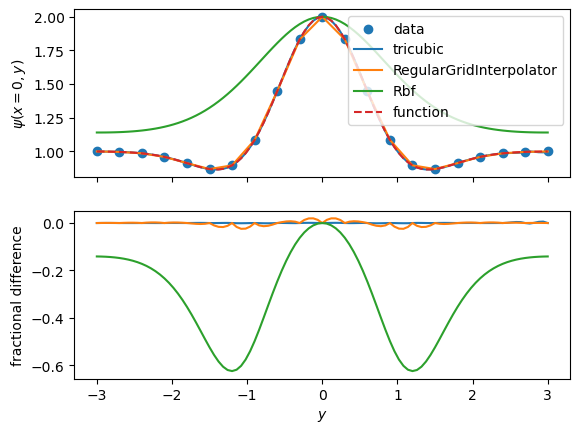

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(Y, Psi[10, :, 10], label="data")
ax[0].plot(Ynew, Psinew[50, :], label="tricubic")
ax[0].plot(Ynew, Psinewa[50, :], label="RegularGridInterpolator")
ax[0].plot(Ynew, Psinewb[50, :], label="Rbf")
ax[0].plot(Ynew, psi(0, Ynew), label="function", ls="--")
ax[0].set_ylabel("$\psi(x = 0, y)$")
ax[0].legend()

ax[1].plot(Ynew, (psi(0, Ynew) - Psinew[50, :]) / psi(0, Ynew))
ax[1].plot(Ynew, (psi(0, Ynew) - Psinewa[50, :]) / psi(0, Ynew))
ax[1].plot(Ynew, (psi(0, Ynew) - Psinewb[50, :]) / psi(0, Ynew))
ax[1].set_xlabel("$y$")
ax[1].set_ylabel("fractional difference");

Clearly, the default settings for `Rbf` are not well-suited to this particular function. This may not be too surprising, since the other interpolators fit to each point. We look at the other two interpolators more closely.

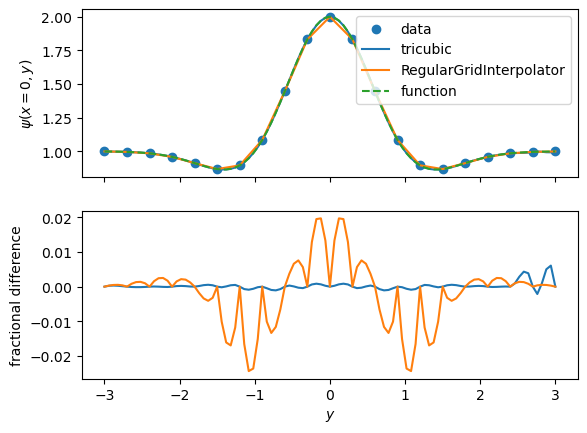

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(Y, Psi[10, :, 10], label="data")
ax[0].plot(Ynew, Psinew[50, :], label="tricubic")
ax[0].plot(Ynew, Psinewa[50, :], label="RegularGridInterpolator")
ax[0].plot(Ynew, psi(0, Ynew), label="function", ls="--")
ax[0].set_ylabel("$\psi(x = 0, y)$")
ax[0].legend()

ax[1].plot(Ynew, (psi(0, Ynew) - Psinew[50, :]) / psi(0, Ynew))
ax[1].plot(Ynew, (psi(0, Ynew) - Psinewa[50, :]) / psi(0, Ynew))
ax[1].set_xlabel("$y$")
ax[1].set_ylabel("fractional difference");

The accuracy looks good. The `Tricubic` interpolator seems to fare better than the linear default of `RegularGridInterpolator`.

We can also make two-dimensional plots. For the `Tricubic` interpolator,

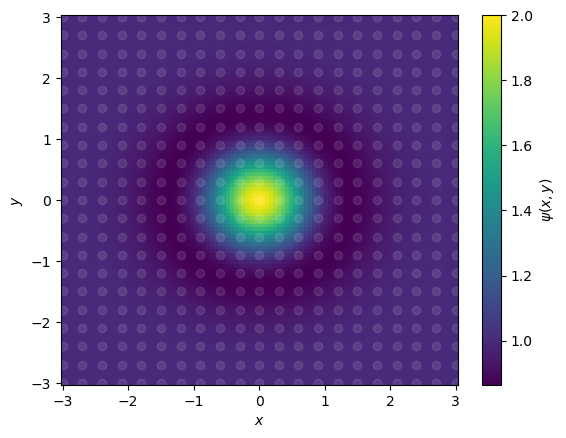

In [13]:
fig, ax = plt.subplots()
p = ax.pcolormesh(Xnew, Ynew, Psinew)
ax.scatter(x[:, :, 0], y[:, :, 0], c="w", alpha=0.1)
fig.colorbar(p, label="$\psi(x, y)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$");

For `RegularGridInterpolator`,

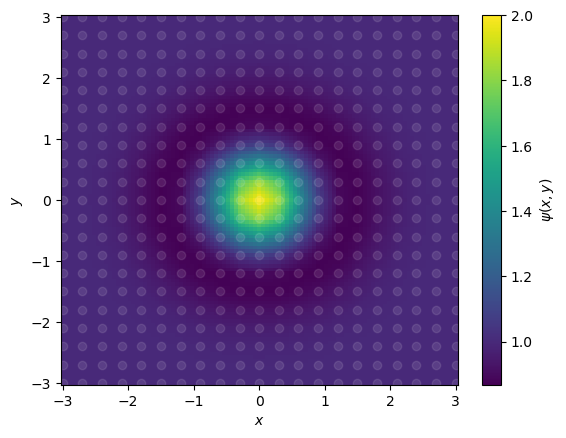

In [14]:
fig, ax = plt.subplots()
p = ax.pcolormesh(Xnew, Ynew, Psinewa)
ax.scatter(x[:, :, 0], y[:, :, 0], c="w", alpha=0.1)
fig.colorbar(p, label="$\psi(x, y)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$");

And for `Rbf`,

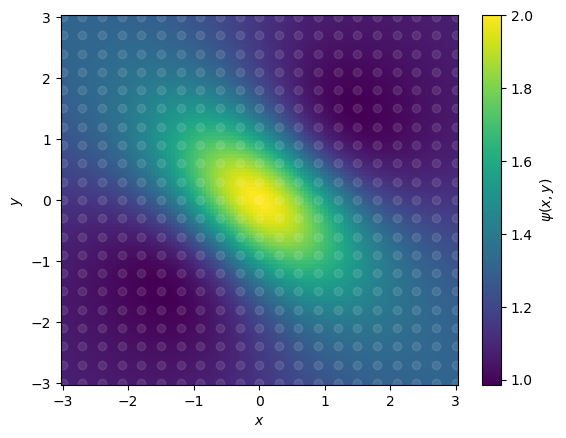

In [15]:
fig, ax = plt.subplots()
p = ax.pcolormesh(Xnew, Ynew, Psinewb)
ax.scatter(x[:, :, 0], y[:, :, 0], c="w", alpha=0.1)
fig.colorbar(p, label="$\psi(x, y)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$");

## Three-dimensional function

Finally, we will look at a three-dimensional function,
$$
g(x, y, z) = y^2 - x^3 + x - z.
$$

In [16]:
def g(x, y, z):
    return y**2 - x**3 + x - z

Setting up the grid and interpolators as before, assuming $z = 0$ from the outset,

In [17]:
X = Y = Z = np.linspace(-1, 1, 21)
x, y, z = np.meshgrid(X, Y, Z, indexing="ij")
G = g(x, y, z)

interp3 = Tricubic(X, Y, Z, G)
interp3a = RegularGridInterpolator((X, Y, Z), G)
interp3b = Rbf(X, Y, Z, g(X, Y, Z))

Xnew = Ynew = np.linspace(-1, 1, 101)
Gnew = np.zeros((Xnew.size, Ynew.size))
Gnewa = np.zeros((Xnew.size, Ynew.size))
Gnewb = np.zeros((Xnew.size, Ynew.size))
for i, X0 in enumerate(Xnew):
    for j, Y0 in enumerate(Ynew):
        Gnew[i, j] = interp3(X0, Y0, 0)
        Gnewa[i, j] = interp3a((X0, Y0, 0))
        Gnewb[i, j] = interp3b(X0, Y0, 0)

So, for the results, we further set $y = 1$.

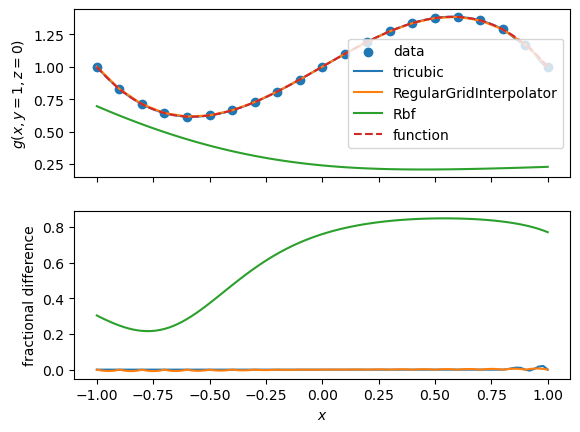

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(X, G[:, -1, 10], label="data")
ax[0].plot(Xnew, Gnew[:, -1], label="tricubic")
ax[0].plot(Xnew, Gnewa[:, -1], label="RegularGridInterpolator")
ax[0].plot(Xnew, Gnewb[:, -1], label="Rbf")
ax[0].plot(Xnew, g(Xnew, 1, 0), label="function", ls="--")
ax[0].set_ylabel("$g(x, y = 1, z = 0)$")
ax[0].legend()

ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnew[:, -1]) / g(Xnew, 1, 0))
ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnewa[:, -1]) / g(Xnew, 1, 0))
ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnewb[:, -1]) / g(Xnew, 1, 0))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("fractional difference");

Ignore `Rbf`,

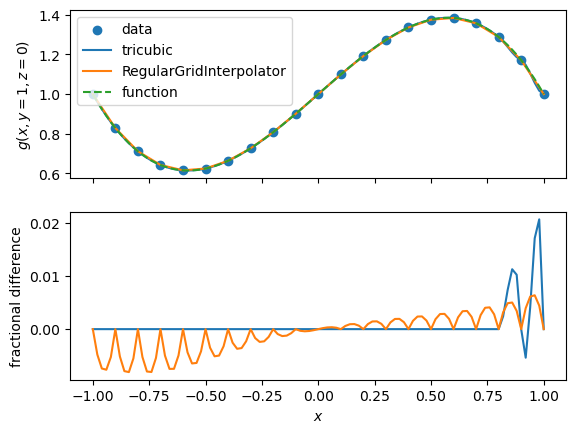

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(X, G[:, -1, 10], label="data")
ax[0].plot(Xnew, Gnew[:, -1], label="tricubic")
ax[0].plot(Xnew, Gnewa[:, -1], label="RegularGridInterpolator")
ax[0].plot(Xnew, g(Xnew, 1, 0), label="function", ls="--")
ax[0].set_ylabel("$g(x, y = 1, z = 0)$")
ax[0].legend()

ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnew[:, -1]) / g(Xnew, 1, 0))
ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnewa[:, -1]) / g(Xnew, 1, 0))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("fractional difference");

`RegularGridInterpolator` has some additional methods that it would be worth delving into. Consider the `cubic` option.

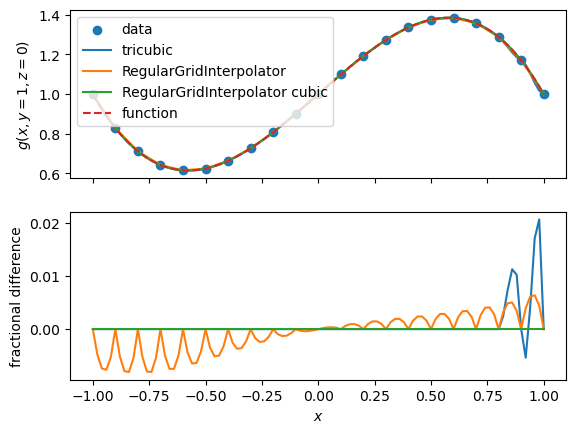

In [20]:
Gnewc = np.zeros((Xnew.size, Ynew.size))
for i, X0 in enumerate(Xnew):
    for j, Y0 in enumerate(Ynew):
        Gnewc[i, j] = interp3a((X0, Y0, 0), method="cubic")

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(X, G[:, -1, 10], label="data")
ax[0].plot(Xnew, Gnew[:, -1], label="tricubic")
ax[0].plot(Xnew, Gnewa[:, -1], label="RegularGridInterpolator")
ax[0].plot(Xnew, Gnewc[:, -1], label="RegularGridInterpolator cubic")
ax[0].plot(Xnew, g(Xnew, 1, 0), label="function", ls="--")
ax[0].set_ylabel("$g(x, y = 1, z = 0)$")
ax[0].legend()

ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnew[:, -1]) / g(Xnew, 1, 0))
ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnewa[:, -1]) / g(Xnew, 1, 0))
ax[1].plot(Xnew, (g(Xnew, 1, 0) - Gnewc[:, -1]) / g(Xnew, 1, 0))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("fractional difference");

One of the strengths of the `Tricubic` interpolator is that derivatives are trivial to calculate. Consider
$$
\frac{\partial g}{\partial x} = - 3 x^2 + 1.
$$

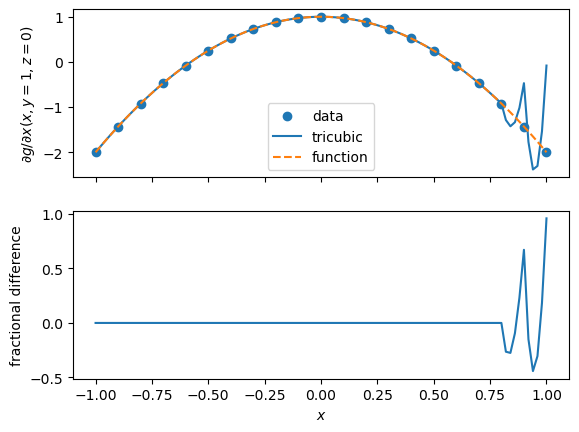

In [21]:
def dgdx(x):
    return -3 * x**2 + 1


dGnewdxa = np.zeros((Xnew.size, Ynew.size))
for i, X0 in enumerate(Xnew):
    for j, Y0 in enumerate(Ynew):
        dGnewdxa[i, j] = interp3(X0, Y0, 0, dx=True)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].scatter(X, dgdx(X), label="data")
ax[0].plot(Xnew, dGnewdxa[:, -1], label="tricubic")
ax[0].plot(Xnew, dgdx(Xnew), label="function", ls="--")
ax[0].set_ylabel("$\partial g / \partial x(x, y = 1, z = 0)$")
ax[0].legend()

ax[1].plot(Xnew, (dgdx(Xnew) - dGnewdxa[:, -1]) / dgdx(Xnew))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("fractional difference");

The accuracy seems reasonable. There is some spurious behaviour near zero, which is to be expected in fractional differences. The derivative is less accurate at the end-points.